<a href="https://colab.research.google.com/github/SarmenSinanian/DS-Unit-2-Regression-Classification/blob/master/Sarmen_Sinanian_DS6_lesson_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Objectives
- Clean data & remove outliers
- Use scikit-learn for linear regression
- Organize & comment code

## Setup

#### If you're using [Anaconda](https://www.anaconda.com/distribution/) locally

Install required Python packages:
- [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling), version >= 2.0
- [Plotly](https://plot.ly/python/getting-started/), version >= 4.0

```
conda install -c conda-forge pandas-profiling plotly
```

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# Predict how much a NYC condo costs 🏠💸

[Amateurs & Experts Guess How Much a NYC Condo With a Private Terrace Costs](https://www.youtube.com/watch?v=JQCctBOgH9I)

> Real Estate Agent Leonard Steinberg just sold a pre-war condo in New York City's Tribeca neighborhood. We challenged three people - an apartment renter, an apartment owner and a real estate expert - to try to guess how much the apartment sold for. Leonard reveals more and more details to them as they refine their guesses.


The condo is 1,497 square feet.

Here are the final guesses:

- Apartment Renter: \$15 million
- Apartment Buyer: \$2.2 million
- Real Estate Expert: \$2.2 million

Let's see how we compare!

First, we need data:

- [Kaggle has NYC property sales data](https://www.kaggle.com/new-york-city/nyc-property-sales), but it's not up-to-date.
- The data comes from the [New York City Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page). There's also a glossary of property sales terms and NYC Building Class Code Descriptions
- The data can also be found on the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Clean data & remove outliers

In [0]:
import pandas as pd
import pandas_profiling

# Read New York City property sales data
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# Get Pandas Profiling Report
df.profile_report()

In [0]:
# Does this data include the Tribeca neighborhood?
mask = df['NEIGHBORHOOD'].str.contains('TRIBECA')
df[mask]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
220,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,222,1013,NaN,R4,"181 HUDSON STREET, 6D",6D,10013.0,1.0,0.0,1.0,"7,878",1840.0,1909.0,2,R4,"$ 2,800,000",01/03/2019
763,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,9022,NaN,R4,"10 LITTLE WEST STREET, 19A",19A,10004.0,1.0,0.0,1.0,0,1759.0,0.0,2,R4,"$ 2,650,000",01/07/2019
996,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,212,1404,NaN,R4,"11 BEACH STREET, 1D",1D,10013.0,1.0,0.0,1.0,"11,213",2651.0,1900.0,2,R4,$ - 0,01/08/2019
1276,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,1441,NaN,R4,"30 LITTLE WEST STREET, 7G",7G,10004.0,1.0,0.0,1.0,0,1190.0,2005.0,2,R4,"$ 1,005,000",01/09/2019
1542,1,TRIBECA,02 TWO FAMILY DWELLINGS,1,132,26,NaN,S2,"75 WARREN STREET, XX",NaN,10007.0,2.0,1.0,3.0,"1,819",10117.0,1905.0,1,S2,"$ 12,950,000",01/10/2019
1543,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,3624,NaN,R4,"2 RIVER TERRACE, 4C",4C,0.0,1.0,0.0,1.0,0,1088.0,2006.0,2,R4,"$ 1,678,000",01/10/2019
1855,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,2610,NaN,R4,"380 RECTOR PLACE, 10A",10A,10280.0,1.0,0.0,1.0,0,873.0,0.0,2,R4,"$ 1,380,000",01/11/2019
2170,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,142,1903,NaN,R4,"111 MURRAY STREET, 37W",37W,10007.0,1.0,0.0,1.0,0,2279.0,2016.0,2,R4,"$ 6,924,100",01/14/2019
2413,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,2506,NaN,R4,"300 ALBANY STREET, 9M",9M,10280.0,1.0,0.0,1.0,0,695.0,1986.0,2,R4,"$ 501,000",01/15/2019
2414,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,3703,NaN,R4,"1 RIVER TERRACE, 9M",9M,0.0,1.0,0.0,1.0,0,1449.0,2006.0,2,R4,"$ 2,400,000",01/15/2019


In [0]:
# Keep this subset
df = df[mask]

# Down from > 20k rows to < 150
df.shape

(146, 21)

In [0]:
# Why so few property sales in Tribeca?
# Check the date range
# It's just the first 4 months of 2019
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)
df['SALE_DATE'].describe()

count                     146
unique                     66
top       2019-02-12 00:00:00
freq                       17
first     2019-01-03 00:00:00
last      2019-04-30 00:00:00
Name: SALE_DATE, dtype: object

In [0]:
# See the Pandas Profiling Report:
# SALE_PRICE was read as strings
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

In [0]:
# SALE_PRICE is now a number, but hard to read in scientific notation
# Format numbers: Comma separator for thousands. Zero decimals
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,146,146,146,0,146,146,146,146,146,146,146,146
mean,1,123,"1,980",nan,"9,732",3,0,3,"4,574","1,595",2,"8,884,964"
std,0,84,"1,738",nan,"1,843",23,0,24,"25,521",781,0,"23,639,981"
min,1,16,1,nan,0,0,0,0,0,0,1,0
25%,1,16,"1,112",nan,"10,007",1,0,1,862,"1,905",2,"976,875"
50%,1,142,"1,362",nan,"10,013",1,0,1,"1,788","1,986",2,"2,750,000"
75%,1,212,"2,194",nan,"10,013",1,0,1,"2,522","2,006",2,"7,131,025"
max,1,224,"9,057",nan,"10,282",283,4,286,"305,542","2,016",4,"260,000,000"


In [0]:
# Max SCALE_PRICE is $260 million!
# Look at this observation.
# Equivalent to: df[df['SALE_PRICE']==260000000]
df.query('SALE_PRICE == 260000000')

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
6499,1,TRIBECA,08 RENTALS - ELEVATOR APARTMENTS,2,224,1,nan,D8,34 DESBROSSES STREET,NaN,"10,013",283,3,286,"36,858","305,542","2,007",2,D8,260000000,2019-02-01


In [0]:
# How many property sales were for multiple units?
df['TOTAL_UNITS'].value_counts()

1      131
0       11
5        1
286      1
8        1
3        1
Name: TOTAL_UNITS, dtype: int64

In [0]:
# Keep only the single units

# Would this be better though?
# df = df[(df.RESIDENTIAL_UNITS==1) & (df.COMMERICAL_UNITS==0)]

df = df.query('TOTAL_UNITS==1')
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,131,131,131,0,131,131,131,131,131,131,131,131
mean,1,118,"2,189",nan,"9,700",1,0,1,"2,520","1,572",2,"7,626,487"
std,0,86,"1,711",nan,"1,943",0,0,0,"4,772",805,0,"11,460,762"
min,1,16,"1,001",nan,0,0,0,1,432,0,2,0
25%,1,16,"1,130",nan,"10,007",1,0,1,982,"1,905",2,"978,750"
50%,1,141,"1,441",nan,"10,013",1,0,1,"1,900","1,987",2,"3,145,000"
75%,1,214,"2,450",nan,"10,280",1,0,1,"2,508","2,006",2,"7,461,000"
max,1,223,"9,057",nan,"10,282",1,1,1,"39,567","2,016",4,"39,285,000"


In [0]:
# Now max sales price is $39 million
# Look at this observation
# It's huge, over 8,000 square feet
# Maybe it's legit, just a huge, expensive condo
df.query('SALE_PRICE == 39285000')

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
9236,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1144,nan,R4,"70 VESTRY STREET, 12S",12S,"10,013",1,0,1,0,"8,346","2,016",2,R4,39285000,2019-02-15


In [0]:
# The min sales price is $0

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:

# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 

# How often did $0 sales occur in this subset of the data?
len(df.query('SALE_PRICE == 0'))

15

In [0]:
# 75% percentile for gross square feet is 2,500
# But the max is over 39,000 square feet.

# Look at property sales for > 5,000 square feet

# We see the same condo we looked at earlier,
# Plus two property sales at 39,567 square feet.
# TOTAL_UNITS = 1, but BUILDING_CLASS_CATEGORY = 2-10 UNIT RESIDENTIAL
# Is this dirty data?

df.query('GROSS_SQUARE_FEET > 5000')

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
9236,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1144,nan,R4,"70 VESTRY STREET, 12S",12S,"10,013",1,0,1,0,"8,346","2,016",2,R4,39285000,2019-02-15
10487,1,TRIBECA,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,179,1607,nan,R1,"24 LEONARD ST, PH W",PH W,"10,013",1,0,1,"9,983","39,567","1,940",2,R1,9857100,2019-02-22
16008,1,TRIBECA,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,179,1602,nan,R1,"24 LEONARD STREET, 2",2,"10,013",1,0,1,"9,983","39,567","1,940",2,R1,9718000,2019-03-21


# What are the building class categories?

In [0]:
# What are the building class categories?
# How frequently does each occur?

df['BUILDING_CLASS_CATEGORY'].value_counts()

13 CONDOS - ELEVATOR APARTMENTS               121
15 CONDOS - 2-10 UNIT RESIDENTIAL               8
46 CONDO STORE BUILDINGS                        1
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      1
Name: BUILDING_CLASS_CATEGORY, dtype: int64

In [0]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

mask = (df['SALE_PRICE'] > 0) & (df['BUILDING_CLASS_CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS')
df = df[mask]

# Down to 106 rows
df.shape

(106, 21)

## Plot relationship between feature & target

- [Plotly Express](https://plot.ly/python/plotly-express/) examples
- [plotly_express.scatter](https://www.plotly.express/plotly_express/#plotly_express.scatter) docs

In [0]:
# Scatter plot
import plotly.express as px
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE')

In [0]:
# With OLS (Ordinary Least Squares) trendline
# The outliers influence the "line of best fit"
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE', trendline='ols')

In [0]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in tital?
# Is this dirty data?

df.query('SALE_PRICE > 35000000')

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
8370,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1105,nan,R4,"70 VESTRY STREET, 3C",3C,"10,013",1,0,1,0,"1,670","2,016",2,R4,36681561,2019-02-12
8371,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1123,nan,R4,"70 VESTRY STREET, 6C",6C,"10,013",1,0,1,0,"1,906","2,016",2,R4,36681561,2019-02-12
8372,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1124,nan,R4,"70 VESTRY STREET, 6D",6D,"10,013",1,0,1,0,"2,536","2,016",2,R4,36681561,2019-02-12
8373,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1125,nan,R4,"70 VESTRY STREET, 6E",6E,"10,013",1,0,1,0,"2,965","2,016",2,R4,36681561,2019-02-12
8374,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1126,nan,R4,"70 VESTRY STREET, 6F",6F,"10,013",1,0,1,0,"2,445","2,016",2,R4,36681561,2019-02-12
8375,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1127,nan,R4,"70 VESTRY STREET, 7A",7A,"10,013",1,0,1,0,"2,844","2,016",2,R4,36681561,2019-02-12
8376,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1128,nan,R4,"70 VESTRY STREET, 7B",7B,"10,013",1,0,1,0,"3,242","2,016",2,R4,36681561,2019-02-12
8377,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1129,nan,R4,"70 VESTRY STREET, 7C",7C,"10,013",1,0,1,0,"1,906","2,016",2,R4,36681561,2019-02-12
8378,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1130,nan,R4,"70 VESTRY STREET, 7D",7D,"10,013",1,0,1,0,"2,536","2,016",2,R4,36681561,2019-02-12
8379,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1131,nan,R4,"70 VESTRY STREET, 7E",7E,"10,013",1,0,1,0,"2,965","2,016",2,R4,36681561,2019-02-12


In [0]:
# Make a judgment call:
# Keep rows where sale price was < $35 million
df = df.query('SALE_PRICE < 35000000')

# Down to 90 rows
df.shape

(90, 21)

In [0]:
# The Mean Sale Price is $3.9 million.
# If we didn't use any data except sales prices,
# we could "predict" that Tribeca condos cost about $3.9 million.
# This is called the "mean baseline."
df['SALE_PRICE'].describe()

count           90
mean     3,928,736
std      3,621,996
min        424,770
25%      1,156,552
50%      2,750,000
75%      5,087,500
max     15,000,000
Name: SALE_PRICE, dtype: float64

In [0]:
# But we *can* use more data beyond the sales price.
# Re-plot the relationship between gross square feet and sale pruce.
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE', trendline='ols')

## Use scikit-learn for Linear Regression

#### Jake VanderPlas, [_Python Data Science Handbook_, Chapter 5.2: Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)

The best way to think about data within Scikit-Learn is in terms of tables of data. 

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)

The features matrix is often stored in a variable named `X`. The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas `DataFrame`.

We also generally work with a label or target array, which by convention we will usually call `y`. The target array is usually one dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`. The target array may have continuous numerical values, or discrete classes/labels. 

The target array is the quantity we want to _predict from the data_: in statistical terms, it is the dependent variable. 

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method.

In [0]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
model = LinearRegression()

# 3. Arrange X features matrix & y target vector
features = ['GROSS_SQUARE_FEET']
target = 'SALE_PRICE'
X = df[features]
y = df[target]

# 4. Fit the model
model.fit(X, y)

# 5. Apply the model
y_pred = model.predict(X)

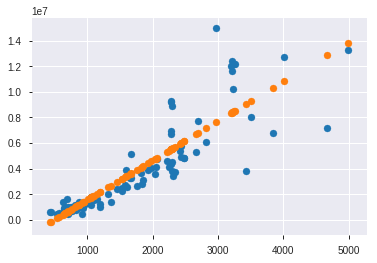

In [0]:
# plot actual vs predicted
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.scatter(X, y_pred);

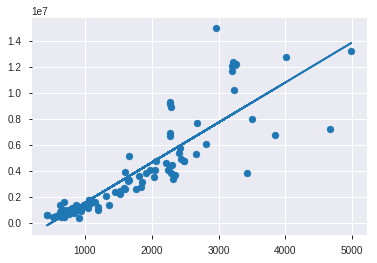

In [0]:
# Interpolate
plt.scatter(X, y)
plt.plot(X, y_pred);

In [0]:
# What pattern did the model "learn", 
# about the relationship between square feet & price?

In [0]:
model.coef_[0]

3076.4476554190023

In [0]:
model.intercept_

-1505364.0408585514

In [0]:
# Equations for a line
print('y = mx + b')
print(f'y = {model.coef_[0]}*x + {model.intercept_}')
print(f'price = {model.coef_[0]}*square_feet + {model.intercept_}')

y = mx + b
y = 3076.4476554190023*x + -1505364.0408585514
price = 3076.4476554190023*square_feet + -1505364.0408585514


In [0]:
# 5. Apply the model to *new/unknown* data
def predict(square_feet):
    y_pred = model.predict([[square_feet]])
    return y_pred[0]

predict(1497)

3100078.099303695

In [0]:
# Give nicer output
def predict(square_feet):
    y_pred = model.predict([[square_feet]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    
    # Format with $ and comma separators. No decimals.
    result = f'${estimate:,.0f} estimated price for {square_feet:,.0f} square foot condo in Tribeca.'
    explanation = f' Each additional square foot is associated with a ${coefficient:,.0f} increase in this model.'
    return result + explanation

predict(1497)

'$3,100,078 estimated price for 1,497 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [0]:
# What does the model for low square footage?
predict(500)

'$32,860 estimated price for 500 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [0]:
# For high square footage?
predict(10000)

'$29,259,113 estimated price for 10,000 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [0]:
# These values are outside the min & max of the data the model was fit on,
# but predictive models assume future data will have similar distribution.
df['SALE_PRICE'].describe()

count           90
mean     3,928,736
std      3,621,996
min        424,770
25%      1,156,552
50%      2,750,000
75%      5,087,500
max     15,000,000
Name: SALE_PRICE, dtype: float64

In [0]:
df['GROSS_SQUARE_FEET'].describe()

count      90
mean    1,766
std     1,019
min       432
25%       874
50%     1,626
75%     2,308
max     4,986
Name: GROSS_SQUARE_FEET, dtype: float64

### Organize & comment code

# How'd we do? ...